In [1]:
# Importing the libraries
# Numpy
import numpy as np

# Pandas
import pandas as pd

# Seaborn
import seaborn as sns

# Scikit Learn
from sklearn.datasets import load_boston

AxesSubplot(0.125,0.125;0.775x0.755)


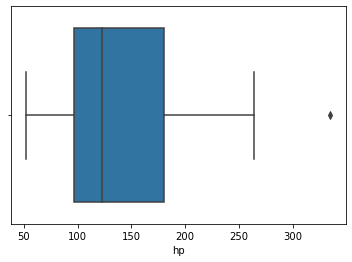

In [2]:
# Load the data
my_car_data = pd.read_csv("mtcars.csv")

# Considering hp column for further operation
my_data = my_car_data["hp"]

# Checking for outliner through boxplot
print(sns.boxplot(x=my_data))

In [3]:
# From the above plot it is clear that outlier is present
# Now detecting the exact outlier by z score method

# Finding the mean
mean = np.mean(my_data)

# Finding the standard deviation
std_dev = np.std(my_data)

# Printing the Mean and Standard deviation
print("""Mean = %s

Standard deviation = %s
""" % (mean, std_dev))

Mean = 146.6875

Standard deviation = 67.48307079371833



In [5]:
# Function for detecting the outlier
def outlier_detector(data):
    """The function detects the outlier from the given data"""
    treshold = 2
    outlier = []
    for i in data:
        # Formula for z score method
        z = (i - np.mean(data)) / np.std(data)
        if z > treshold:
            outlier.append(i)
    print("The outlier(s) is/are:", outlier)

In [6]:
outlier_detector(my_data)

The outlier(s) is/are: [335]


In [7]:
# Loading the data
boston = load_boston()
columns = boston.feature_names

# Creating DataFrame
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns

# Description of dataset
#print(boston.DESCR)

In [8]:
print(boston_df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

<AxesSubplot:xlabel='DIS'>

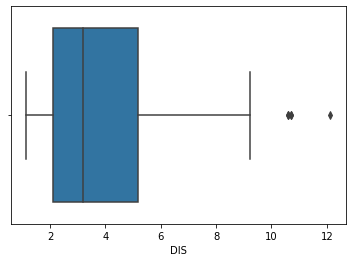

In [9]:
# Consudering the DIS column for opertions
my_boston_data = boston_df["DIS"]

# Box plot to confirm the outliers
sns.boxplot(x = my_boston_data)

In [10]:
# Function to find the required upper and the lower limit
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1, Q3 = np.percentile(datacolumn, [25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [11]:
# Finding upper and lower limt for our data
low_border, high_border = outlier_treatment(my_boston_data)

# Printing the lower and upper limit
print(low_border,high_border)

-2.5322000000000005 9.820800000000002


In [12]:
# Outliers
print(boston_df[(my_boston_data > high_border)|(my_boston_data < low_border)])

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE      DIS  RAD    TAX  \
351  0.07950  60.0   1.69   0.0  0.411  6.579  35.9  10.7103  4.0  411.0   
352  0.07244  60.0   1.69   0.0  0.411  5.884  18.5  10.7103  4.0  411.0   
353  0.01709  90.0   2.02   0.0  0.410  6.728  36.1  12.1265  5.0  187.0   
354  0.04301  80.0   1.91   0.0  0.413  5.663  21.9  10.5857  4.0  334.0   
355  0.10659  80.0   1.91   0.0  0.413  5.936  19.5  10.5857  4.0  334.0   

     PTRATIO       B  LSTAT  
351     18.3  370.78   5.49  
352     18.3  392.33   7.79  
353     17.0  384.46   4.50  
354     22.0  382.80   8.05  
355     22.0  376.04   5.57  


In [13]:
# Removing the outliers
print(boston_df[~((my_boston_data < low_border) | (my_boston_data > high_border))])

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1